# Week 11 Discussion: Convolutional Neural Network

## Objectives

Convolutional Neural Networks (CNNs) are a class of deep neural networks primarily designed to process and analyze visual data like images and videos. They have revolutionized various fields such as computer vision, image recognition, and even natural language processing.

At their core, CNNs leverage a specialized kind of neural network layer called a convolutional layer. This layer applies **convolutional filters** to input data, allowing the network to learn hierarchical representations of features within the data. **These filters capture different patterns** such as edges, textures, and shapes, gradually building up to more complex features as the network goes deeper.

The architecture of a typical CNN consists of multiple layers, including convolutional layers, pooling layers, and fully connected layers. Convolutional layers perform feature extraction, pooling layers reduce the spatial dimensions of the feature maps, and fully connected layers make the final predictions based on the extracted features.

One of the key advantages of CNNs is their ability to automatically learn features from raw data, **reducing the need for manual feature engineering**. This makes them highly effective for tasks like image classification, object detection, and semantic segmentation.

This week, we're embarking on constructing our inaugural CNN network. Our objective is to develop a classifier capable of discerning between images depicting steak, sushi, or pizza. Therefore, our agenda for this week includes:

1. **Acquiring the desired dataset and visualizing sample images**, along with investigating methods to preprocess the data for our training purposes. Consequently, crafting a custom dataset from the downloaded dataset, tailored to our specific requirements.

2. **Developing our CNN** neural network designed for classification tasks.

3. Developing code to **train the CNN** neural network on the dataset

4. Concluding by **evaluating the performance** of our model through plotting loss, and using the model for making predictions.


## Sources


This discussion on CNNs is based on the following references:
<br>
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
<br>
https://github.com/mrdbourke/pytorch-deep-learning/blob/main/04_pytorch_custom_datasets.ipynb

## 1. Dataset download and preprocess

Acquiring the dataset, visualizing sample images, and preprocessing the data.


Initially, we need to download the data. The dataset chosen for our purposes is a subset derived from the widely recognized [Food101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) dataset. Food101 comprises 1000 images representing 101 distinct categories of food, resulting in a cumulative count of 101,000 images (with 75,750 allocated for training and 25,250 for testing). However, for our specific application, we will narrow down the categories to three: pizza, steak, and sushi. Additionally, rather than utilizing the entire set of 1000 images per class, we will commence with a randomly selected 10% subset from each category.


Let's write some code to download the formatted data from `GitHub`.


In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

train_dir = image_path / "train"
test_dir = image_path / "test"

print (f"train directory: {train_dir}, test directory: {test_dir}")

data\pizza_steak_sushi directory exists.
train directory: data\pizza_steak_sushi\train, test directory: data\pizza_steak_sushi\test


We possess images of pizza, steak, and sushi organized in the standard image classification format. In this format, each class of images is segregated into distinct directories labeled with the corresponding class name. For instance, all images depicting pizza are stored within the "pizza/" directory.

This storage convention is prevalent across numerous image classification benchmarks, including the widely recognized `ImageNet` dataset, which stands as one of the most prominent datasets in the field of computer vision.

Below is an illustration of the storage format, with arbitrary image numbers provided for reference.

pizza_steak_sushi/ <- overall dataset folder

    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...


To examine the contents of our data directory, we can devise a brief auxiliary function to traverse each of the subdirectories and tally the number of files contained within.


In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


After observing the structure of our directory, let's proceed with data visualization. We'll develop code to accomplish the following tasks:

1. Retrieve all image paths utilizing `pathlib.Path.glob()` to identify files with the `.jpg` extension.
2. Select a random image path employing Python's `random.choice()`.
3. Extract the image class name utilizing `pathlib.Path.parent.stem`.
4. Given that we're handling images, we'll access the random image path using `PIL.Image.open()` (`PIL` denotes Python Image Library).
5. Subsequently, we'll display the image and output certain metadata.


Random image path: data/pizza_steak_sushi/test/pizza/3092704.jpg
Image class: pizza
Image height: 512
Image width: 512


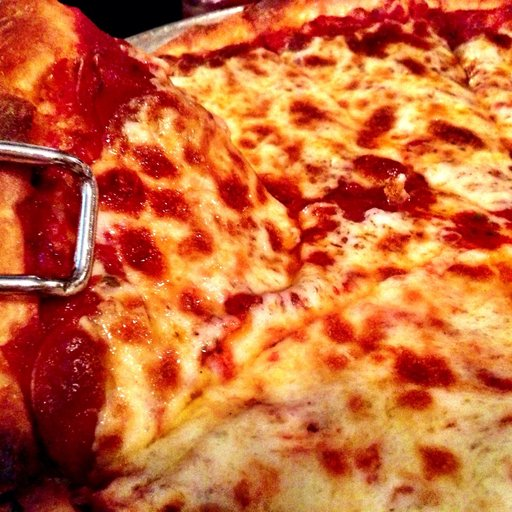

In [ ]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Suppose we intend to incorporate our image data into `PyTorch`. Before proceeding, we must:

Convert it into tensors, representing numerical representations of our images.

1. Transform it into a `torch.utils.data.Dataset`, followed by a `torch.utils.data.DataLoader`, which we'll abbreviate as Dataset and DataLoader, respectively.
2. PyTorch offers various pre-built datasets and dataset loaders tailored to different problem domains:

For vision tasks: `torchvision.datasets`
For audio tasks: `torchaudio.datasets`
For text tasks: `torchtext.datasets`
For recommendation systems: `torchrec.datasets`
Given that our focus is on a vision problem, we'll explore `torchvision.datasets` for our data loading functions, as well as `torchvision.transforms` for data preparation.

Let's begin by importing some fundamental libraries.


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

We possess image folders, yet prior to their utilization with `PyTorch`, conversion into tensors is essential. One approach for achieving this is by leveraging the `torchvision.transforms` module.

`torchvision.transforms` offers a plethora of pre-built methods for image formatting, tensor conversion, and even manipulation for data augmentation, a technique altering data to enhance model generalization, as we'll explore later.

To familiarize ourselves with `torchvision.transforms`, let's devise a sequence of transformation steps that:

1. Resize the images using `transforms.Resize()`, adjusting them from approximately 512x512 to 48x48.
2. Randomly flip our images horizontally using `transforms.RandomHorizontalFlip()`, potentially enhancing our dataset through artificial variation.
3. Convert our images from `PIL` format to `PyTorch` tensors using `transforms.ToTensor()`.
4. We can consolidate these steps via `torchvision.transforms.Compose()`.


In [ ]:
data_transform = transforms.Compose([
    # Resize the images to 48x48
    transforms.Resize(size=(48, 48)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

Now we've got a composition of transforms, let's write a function to try them out on various images.


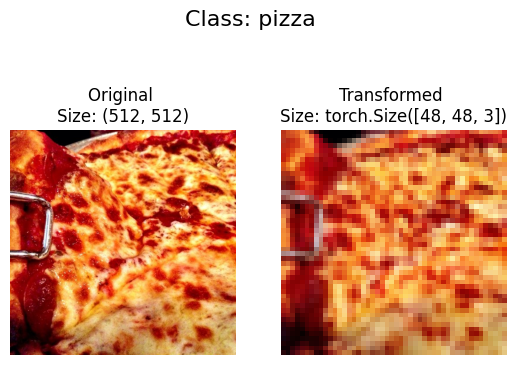

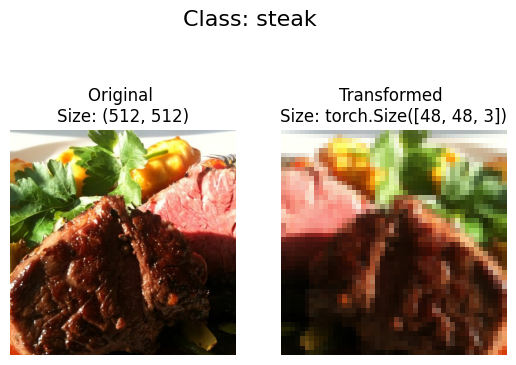

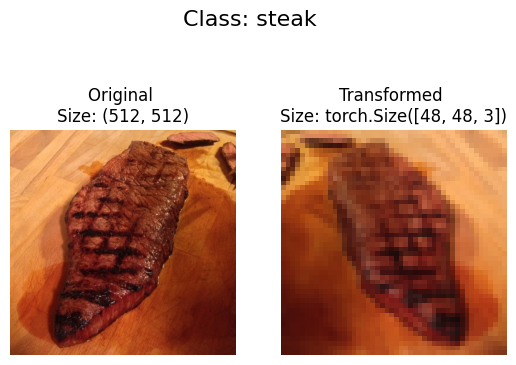

In [ ]:
import matplotlib.pyplot as plt
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

Let's proceed with transforming our image data into a `Dataset` compatible with `PyTorch`.

Given that our data adheres to the standard image classification format, we can employ the `torchvision.datasets.ImageFolder` class. This class allows us to specify the file path of the target image directory and a sequence of transformations to apply to our images.

We'll initiate this process by testing it on our data folders `train_dir` and `test_dir`, passing in the `transform=data_transform` argument to convert our images into tensors


In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(48, 48), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


It appears that `PyTorch` has successfully registered our `Datasets`.

To examine them, let's review the classes and `class_to_idx` attributes, along with the lengths of our training and test sets.


In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

Moreover, we can utilize indexing on our `train_data` and `test_data` Datasets to retrieve samples along with their respective target labels.


In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1098, 0.1020, 0.1020,  ..., 0.1216, 0.1255, 0.1216],
         [0.1020, 0.0941, 0.0980,  ..., 0.1333, 0.1333, 0.1333],
         [0.1059, 0.0980, 0.0941,  ..., 0.1333, 0.1373, 0.1333],
         ...,
         [0.1294, 0.1333, 0.1490,  ..., 0.1725, 0.1686, 0.1686],
         [0.0980, 0.1098, 0.1216,  ..., 0.1725, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1020,  ..., 0.1686, 0.1686, 0.1686]],

        [[0.0745, 0.0745, 0.0784,  ..., 0.0588, 0.0627, 0.0627],
         [0.0706, 0.0706, 0.0745,  ..., 0.0667, 0.0667, 0.0667],
         [0.0745, 0.0745, 0.0745,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.1333, 0.1490, 0.1608,  ..., 0.2627, 0.2471, 0.2392],
         [0.1176, 0.1294, 0.1412,  ..., 0.2627, 0.2431, 0.2353],
         [0.1059, 0.1137, 0.1255,  ..., 0.2510, 0.2431, 0.2314]],

        [[0.0941, 0.0902, 0.0941,  ..., 0.0078, 0.0196, 0.0196],
         [0.0902, 0.0902, 0.0941,  ..., 0.0157, 0.0157, 0.0157],
         [0.0941, 0.0863, 0.0824,  ..., 0.01

Our images have been transformed into tensors, structured as [3, 48, 48], while the labels are represented as integers corresponding to specific classes, as indicated by the `class_to_idx` attribute.

Now we proceed with plotting a single image tensor using `matplotlib`. First, we need to rearrange its dimensions, as `matplotlib` prefers the HWC format (height, width, color channels), while our current format is CHW (color channels, height, width).


Original shape: torch.Size([3, 48, 48]) -> [color_channels, height, width]
Image permute shape: torch.Size([48, 48, 3]) -> [height, width, color_channels]


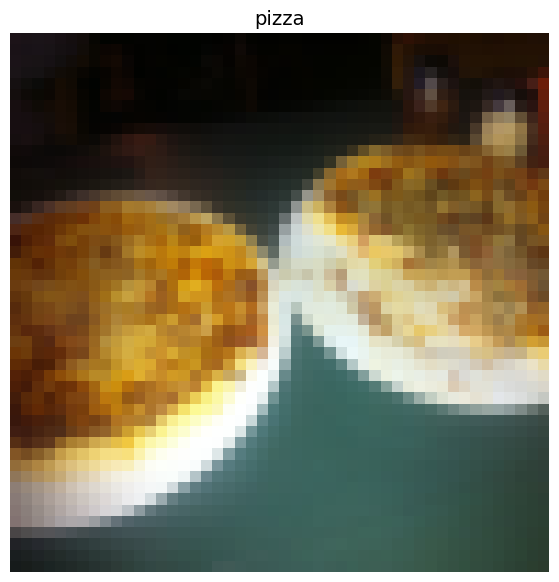

In [ ]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

Now that our images are organized as `PyTorch` Datasets, let's transform them into `DataLoaders` using `torch.utils.data.DataLoader` to make them iterable.


In [ ]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=64,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=64,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7df2f0243d60>,
 <torch.utils.data.dataloader.DataLoader at 0x7df2f0243430>)

In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
    print(f"batch#={batch}, X.shape={X.shape}; y.shape={y.shape}")

batch#=0, X.shape=torch.Size([64, 3, 48, 48]); y.shape=torch.Size([64])
batch#=1, X.shape=torch.Size([64, 3, 48, 48]); y.shape=torch.Size([64])
batch#=2, X.shape=torch.Size([64, 3, 48, 48]); y.shape=torch.Size([64])
batch#=3, X.shape=torch.Size([33, 3, 48, 48]); y.shape=torch.Size([33])


With our data now iterable, let's put it to the test and examine the shapes.


In [ ]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([64, 3, 48, 48]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([64])


## 2. Building CNN

Crafting a custom dataset from the downloaded dataset, tailored to our specific requirements.

Building neural network to classify this dataset.

In alignment with the more sophisticated implementations of CNNs, we establish blocks comprising CNN layers integrated with skip connections. These blocks are subsequently employed to construct the entire network. Initially, we'll craft a CNN block featuring two convolutional layers, followed by batch normalization, followed by the ReLU activation function. Moreover, we'll incorporate a skip connection linking the input to the output.


In [ ]:
import torch.nn as nn

class cnn_block(nn.Module):
  def __init__(self, in_channels = 3, n_hidden = 5, kernel_size = (2, 2)):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Conv2d(in_channels       = in_channels, out_channels = n_hidden, kernel_size = kernel_size, bias=False, padding = 'same'),
        nn.BatchNorm2d(num_features = n_hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Conv2d(in_channels       = n_hidden, out_channels = in_channels, kernel_size = kernel_size, bias=False, padding = 'same'),
        nn.BatchNorm2d(num_features = in_channels),
        nn.ReLU(),
        nn.Dropout(p=0.2))

  def forward(self, x):
    return x + self.layers(x)

As observed above, the `cnn_block` class inherits from the `nn.Module` class. It's essential for all building blocks developed in `Pytorch` to inherit from the `nn.Module` class.

We utilize `nn.Sequential` when we aim to apply a sequence of `Pytorch` layers consecutively.

The argument `padding='same'` ensures that the output image maintains the same size as the input image, a crucial aspect for implementing a skip connection, as both tensors (input and output) need to be added together.

Additionally, in the convolutional layer, we set `bias=False` since it is succeeded by batch normalization, which renormalizes the data. Therefore, a bias term in the convolution has no significant effect.


Typically, in this coding style for neural networks, we construct the building blocks of the networks within the `__init__` function, and specify their usage in the `forward` method. In this instance, we instantiate `self.layers`, as previously described, within the `__init__` function. In the `forward` method, we define the output of the block to be the result of passing the input through `self.layers`, augmented by the input itself (forming a skip connection). This delineates the output of the block.


Similarly, following the aforementioned approach, we proceed to establish a linear block, intended to be employed subsequent to the CNN blocks, operating on the flattened version of the input.


In [ ]:
class linear_block(nn.Module):
  def __init__(self, in_features, n_hidden):
    super().__init__()
    self.in_features = (in_features, n_hidden)
    self.layers = nn.Sequential(
        nn.Linear(in_features = in_features, out_features = n_hidden),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features = n_hidden, out_features = in_features),
        nn.ReLU()
    )

  def forward(self, x):
    return x + self.layers(x)

Putting it all together, we define our network as follows:


In [ ]:
class CNNClassifier(nn.Module):
  def __init__(self, in_channels = 3, cnn_channels = 3, linear_hidden = 1000, n_classes = 3, kernel_size = (2, 2)):
    super().__init__()
    self.cnn_layers = nn.Sequential(
        cnn_block(in_channels, cnn_channels, kernel_size),
        cnn_block(in_channels, cnn_channels, kernel_size),
        cnn_block(in_channels, cnn_channels, kernel_size))

    self.down_sample = nn.Conv2d(in_channels = in_channels, out_channels = 1, kernel_size = (1, 1))

    self.linear_layers = nn.Sequential(
        linear_block(48*48, linear_hidden),
        linear_block(48*48, linear_hidden)
    )
    self.last_layer = nn.Linear(48*48, n_classes)

    self.all        = nn.Sequential(
        self.cnn_layers,
        self.down_sample,
        nn.Flatten(),
        self.linear_layers,
        self.last_layer,
    )

  def forward(self, x):
    return self.all(x)

## 3. Training CNN

Developing code to train the CNN neural network on the dataset.


Let's initialize several components:

- Define a device, typically either `CPU` or `GPU`, depending on the available hardware. Setting the device variable early on allows us to write device-agnostic code so the code works if `GPU` is available or not.
- Instantiate a `CNNClassifier` object, representing the classifier intended for food prediction.
- Define a loss function suitable for multi-class classification, here it's cross-entropy loss.
- Initialize an optimizer, may be `Adam` or `SGD`.

In [ ]:
from torch.optim import Adam
device    = 'cuda' if torch.cuda.is_available() else 'cpu'
model     = CNNClassifier(in_channels = 3, cnn_channels = 20, linear_hidden = 10, n_classes = 3, kernel_size = (4, 4)).to(device)
loss_fn   = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

Now, let's execute a training loop. The code below entails an outer loop iterating over the number of epochs, traversing the training set. Each iteration of this loop encompasses two nested loops: one iterating over training samples to execute gradient descent and another traversing through testing samples to calculate the loss on the test set.

For backpropagation, we begin by invoking `zero_grad()` on the optimizer. This step is crucial because, by default, the optimizer accumulates gradients, so resetting them to zero ensures that gradients from different batches do not accumulate. Subsequently, we invoke `backward()` on the loss, essentially computing gradients required for gradient descent. Finally, `optimizer.step()` executes the gradient descent step.


In [ ]:
import numpy as np
from tqdm import tqdm
n_epochs = 50
train_loss, test_loss = [], []

for epoch in tqdm(range(n_epochs)):

    # do a loop over all training samples
    model.train() # telling the model we are training it as it needs to keep track of gradients (and other things) in this modality
    epoch_train_loss = []
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        preds = model(X)

        loss = loss_fn(preds, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss.append(loss.item())

    # do a loop over all testing samples
    model.eval() # telling the model we are evaluating it
    epoch_test_loss = []
    with torch.no_grad(): # alternatively, torch.no_grad()
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)
            preds = model(X)
            loss  = loss_fn(preds, y)
            epoch_test_loss.append(loss.item())

    train_loss.append(np.mean(epoch_train_loss))
    test_loss.append(np.mean(epoch_test_loss))


100%|██████████| 50/50 [02:40<00:00,  3.21s/it]


Key aspects of `model.eval()`:

1. Deactivation of Dropout:
During training, dropout layers are utilized to randomly deactivate a portion of neurons, preventing overfitting.
In evaluation mode (model.eval()), dropout layers are turned off, ensuring that all neurons contribute to the predictions. This is essential for maintaining consistency during inference.

2. Batch Normalization Behavior:
Batch normalization layers adapt their behavior based on whether the model is in training or evaluation mode.
In evaluation mode, batch normalization layers employ population statistics rather than batch statistics, offering a stable normalization process during inference.
3. Consistent Inference:
The primary purpose of model.eval() is to create a consistent environment for model inference.
By deactivating dropout and adjusting batch normalization, the model's behavior during evaluation aligns with its behavior during training, eliminating potential sources of variability.

reference: https://www.geeksforgeeks.org/what-does-model-eval-do-in-pytorch/

## 4. Evaluation


We can also develop a test code that passes specific images to the model and gets it's predictions:


In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, and target device
def pred_and_plot_image(model,
                        image_path,
                        class_names,
                        image_size = (48, 48),
                        device =device):


    # 2. Open image
    img = Image.open(image_path)

    ### Predict on image ###

    # 3. Make sure the model is on the target device
    model.to(device)

    # 4. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 5. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = data_transform(img).unsqueeze(dim=0)

      # 6. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 7. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 8. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 9. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

And we randomly read sample test images and get predictions from the model:


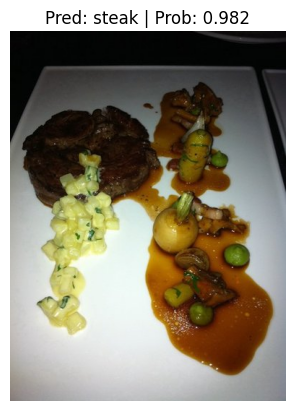

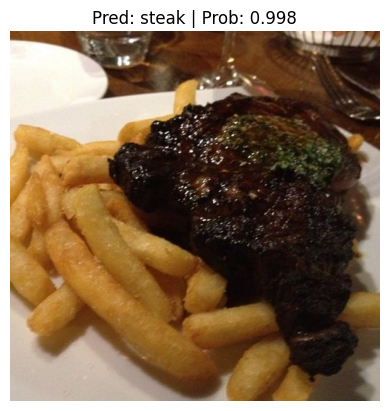

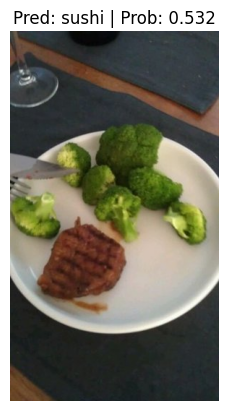

In [ ]:
import random
num_images_to_plot = 3
test_image_path_list = list(Path(train_dir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))

## What We Have Learned


In this discussion, we accomplished the following:

1. Acquired the desired dataset and visualizied sample images, discussed methods to preprocess the data for our training purposes. Consequently, crafted a custom dataset from the downloaded dataset.

2. Developed a CNN neural network designed for our classification task.

3. Developed code to train the CNN neural network on the dataset

4. Concluded by evaluating the performance of our model through plotting loss, and using the model for making predictions.


Hope you have enjoyed this lesson!
